# Finding the (math) cultural similarity

When someone thinks about Why humans behave as we do, one of the most common answers is "because of culture". And very often that is the end of the issue. But if one wants to go deeper, you better ask to an ethnologist or read an Ethnology book, because Ethnology is the Social Science that has be trying to go deeper on cultural  problems.

Ethnologic work tends to be a really hard proccess to sistematize large number of data across multiples research sources. Very heterogenouous sources actually, about complex aspect of human activity that we tend to call 'culture'.

Culture is...a polisemic word, which means it has many meanings, as someone has put (Kuper, 1999), culture is battle of meaning. But culture definition is another story. The most important thing that we need to know is that culture is in the realm of meaning and behaviour. So, Ethnology have being using mainly qualitative methodologies to explore it.

Qualitative is often viewed as non-numerical, more related to narratives, opinions, textual and unstructured data. Despite qualitative doesn't involve numbers, it doesn't mean doesn't support mathematical approach. Actually, many Qualitative technics as classification and codification are based on logic and set theory. Many are task to build networks between people, concepts or genalogic studies, which are all related to graph theory.

As an Anthopologist I am very familiar and I handle many of these techniques with expertice, but I am also a Data Scientist and I can handle many quantitative and computational techniques. Is from this point of view that I want to apply some "digital humanities" approach to a very old problem in Ethnologic field. I like to thing that we could call this approach a mixed method between quantitative and cualitative.

Today I am going to experiment with this. I will use one of the most classic ethnologic datasets (Murdock Ethnographic Atlas) to compare similarity among cultures. Something that in other times would require a very expert judgement about many aspects of hundreds of cultural groups.

To do so, I will transform each cultural group into a multidimensional vector (Cultural Algebra!) then I will be able to calculate Cosine distance (yes, I will use some geometry and numeric degrees!, god bless us all). Shorter the distance between this abstract vectors, higher the cultural similarity.

The Ethnographic Atlas dataset (ea) contains information about cultural 1291 groups and 94 features, including economic, political, religious, kindship aspect of its social life, all aspect that are part of a board definition of culture.

One could always find many arguments about Why this approach is incomplete, limited or simplistic, but is on hand and no one has done it before. Worth trying and understand how much incomplete, limited, simplistic (or useful) could be.

Enough talking, lets work.


#### Load dataset

Dataset has 5 different tables. I need to combine some of its aspect to organice a single table with the features I need to perform calculations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ea=pd.read_csv("data.csv")
soc=pd.read_csv("societies.csv")
var=pd.read_csv("variables.csv")
#societies_mapping=pd.read_csv("societies_mapping.csv")
codes=pd.read_csv("codes.csv")

### Explore dataset and its relations

In [3]:
ea.head()

,soc_id,sub_case,year,var_id,code,comment,references,source_coded_data,admin_comment
0,Aa1,Nyai Nyae region,1950.0,EA001,8.0,NaN,biesele1972; biesele1975; biesele1976; draper1...,EthnographicAtlas_1967_p62,NaN
1,Aa2,with special reference to Central Dorobo,1920.0,EA001,4.0,NaN,huntingford1929; huntingford1942; huntingford1...,EthnographicAtlas_1967_p62,NaN
2,Aa3,Gei/Khauan tribe,1840.0,EA001,1.0,NaN,hoernl1918; hoernl1925; kohler1970; murdock193...,EthnographicAtlas_1967_p62,NaN
3,Aa4,NaN,1920.0,EA001,4.0,NaN,lebzelter1934; schmidt1930; vedder1923,Ethnology_Vol1_No3_Jul_1962,NaN
4,Aa5,"Epulu net-hunters, Ituri forest",1930.0,EA001,3.0,NaN,deleeuwe1966; hart1978; putnam1948; turnbull19...,EthnographicAtlas_1967_p62,NaN


In [4]:
var.head()

,id,category,title,definition,type,units,source,changes,notes
0,EA001,"Subsistence, Economy",Subsistence economy: gathering,Dependence on the gathering of wild plants and...,Ordinal,NaN,Murdock (1962-1971); Gray (1999),NaN,NaN
1,EA002,"Subsistence, Economy",Subsistence economy: hunting,"Dependence on hunting, including trapping and ...",Ordinal,NaN,Murdock (1962-1971); Gray (1999),NaN,NaN
2,EA003,"Subsistence, Economy",Subsistence economy: fishing,"Dependence on fishing, including shellfishing ...",Ordinal,NaN,Murdock (1962-1971); Gray (1999),NaN,NaN
3,EA004,"Subsistence, Economy",Subsistence economy: animal husbandry,"Dependence on animal husbandry, relative to ot...",Ordinal,NaN,Murdock (1962-1971); Gray (1999),NaN,NaN
4,EA005,"Subsistence, Economy",Subsistence economy: agriculture,"Dependence on agriculture, relative to other s...",Ordinal,NaN,Murdock (1962-1971); Gray (1999),NaN,NaN


In [5]:
soc.head()

,id,xd_id,pref_name_for_society,glottocode,ORIG_name_and_ID_in_this_dataset,alt_names_by_society,main_focal_year,HRAF_name_ID,HRAF_link,origLat,origLong,Lat,Long,Comment,glottocode_comment
0,Aa1,xd1,!Kung,juho1239,Kung (Aa1),"Kung Bushmen, !Kung (Was Nyae), Was Nyae",1950.0,San (FX10),http://ehrafworldcultures.yale.edu/collection?...,-20.0,21.0,-20.0,21.0,Original,NaN
1,Ab1,xd10,Herero,here1253,Herero (Ab1),"Damara, Ovaherero",1900.0,NaN,NaN,-21.0,16.0,-21.0,16.0,Original,NaN
2,Ad31,xd100,Duruma,duru1249,Duruma (Ad31),Waduruma,1910.0,NaN,NaN,-4.0,39.0,-4.0,39.0,Original,NaN
3,Ad32,xd101,Giriama,giry1241,Giriama (Ad32),"Kiriama, Wagiryama",1900.0,NaN,NaN,-3.0,40.0,-3.0,40.0,Original,NaN
4,Ad33,xd102,Pokomo,poko1261,Pokomo (Ad33),Wapokomo,1900.0,NaN,NaN,-1.0,40.0,-1.0,40.0,Original,NaN


### Aspect of culture measured.

In [6]:
set([item for lista in var.category.str.split(", ").tolist() for item in lista])

{'Class',
 'Community organization',
 'Ecology',
 'Economy',
 'Games',
 'Gender',
 'Housing',
 'Kinship',
 'Labour',
 'Leadership',
 'Marriage',
 'Politics',
 'Population',
 'Property',
 'Ritual',
 'Settlement',
 'Subsistence',
 'Wealth Transactions'}

In [7]:
from collections import Counter
var.category.str.split(", ").map(Counter).sum()#.value_counts()

Counter({'Class': 6,
         'Community organization': 16,
         'Ecology': 6,
         'Economy': 44,
         'Games': 1,
         'Gender': 15,
         'Housing': 11,
         'Kinship': 25,
         'Labour': 24,
         'Leadership': 4,
         'Marriage': 19,
         'Politics': 12,
         'Population': 2,
         'Property': 4,
         'Ritual': 7,
         'Settlement': 2,
         'Subsistence': 11,
         'Wealth Transactions': 6})

In [8]:
var.type.value_counts()

Categorical    84
Ordinal         9
Continuous      1
Name: type, dtype: int64

There is three kind of features. It I should make a different pre-proccesing pipeline for each kind.
 
 

In [8]:
var[var.type == 'Continuous'].head()

,id,category,title,definition,type,units,source,changes,notes
93,EA202,Population,Population size,"Population of ethnic group as a whole, unless ...",Continuous,NaN,Murdock (1962-1971); Ember (1992),NaN,NaN


In [9]:
ea[ea.var_id == "EA202"].head()

,soc_id,sub_case,year,var_id,code,comment,references,source_coded_data,admin_comment
20656,Aa1,Nyai Nyae region,1953.0,EA202,3500.0,"Of this total, 1,000 were located in the Nyae ...",NaN,Carol Ember's Concordance Database,NaN
20657,Aa2,with special reference to Central Dorobo,1925.0,EA202,1100.0,221 Central Dorobo in 1942,NaN,EA Bibliography,NaN
20658,Aa3,Gei/Khauan tribe,1876.0,EA202,2500.0,in 1876; See HRAF reference 4:7; note focal ye...,NaN,Carol Ember's Concordance Database,NaN
20659,Aa4,NaN,1946.0,EA202,29000.0,in 1946; note focal year for cultural data is ...,NaN,EA Bibliography,NaN
20660,Aa5,"Epulu net-hunters, Ituri forest",1951.0,EA202,40000.0,in 1951; See HRAF reference 2:26; note focal y...,NaN,Carol Ember's Concordance Database,NaN


In [10]:
var[var.type == 'Categorical'].head(3)

,id,category,title,definition,type,units,source,changes,notes
5,EA006,"Marriage, Kinship, Wealth Transactions, Economy",Transactions at marriage: prevailing type,Prevailing type of transfer or exchange at mar...,Categorical,NaN,Murdock (1962-1971); Gray (1999),NaN,NaN
6,EA007,"Marriage, Kinship, Wealth Transactions, Economy",Transactions at marriage: alternate type,Alternative types of transfer or exchange at m...,Categorical,NaN,Murdock (1962-1971); Gray (1999),NaN,NaN
7,EA008,"Marriage, Kinship",Domestic organization,The prevailing form of domestic or familial or...,Categorical,NaN,Murdock (1962-1971); Gray (1999),NaN,NaN


In [11]:
ea[ea.var_id == "EA007"].head(3)

,soc_id,sub_case,year,var_id,code,comment,references,source_coded_data,admin_comment
90370,Aa1,Nyai Nyae region,1950.0,EA007,8.0,NaN,biesele1972; biesele1975; biesele1976; draper1...,EthnographicAtlas_1967_p62,NaN
90371,Aa2,with special reference to Central Dorobo,1920.0,EA007,8.0,NaN,huntingford1929; huntingford1942; huntingford1...,EthnographicAtlas_1967_p62,NaN
90372,Aa3,Gei/Khauan tribe,1840.0,EA007,1.0,NaN,hoernl1918; hoernl1925; kohler1970; murdock193...,EthnographicAtlas_1967_p62,NaN


In [12]:
ea[ea.var_id == "EA007"].code.value_counts()

8.0    1036
2.0     123
3.0      31
1.0      29
7.0      28
5.0      19
6.0       6
Name: code, dtype: int64

In [13]:
var[var.type == 'Ordinal'].head()

,id,category,title,definition,type,units,source,changes,notes
0,EA001,"Subsistence, Economy",Subsistence economy: gathering,Dependence on the gathering of wild plants and...,Ordinal,NaN,Murdock (1962-1971); Gray (1999),NaN,NaN
1,EA002,"Subsistence, Economy",Subsistence economy: hunting,"Dependence on hunting, including trapping and ...",Ordinal,NaN,Murdock (1962-1971); Gray (1999),NaN,NaN
2,EA003,"Subsistence, Economy",Subsistence economy: fishing,"Dependence on fishing, including shellfishing ...",Ordinal,NaN,Murdock (1962-1971); Gray (1999),NaN,NaN
3,EA004,"Subsistence, Economy",Subsistence economy: animal husbandry,"Dependence on animal husbandry, relative to ot...",Ordinal,NaN,Murdock (1962-1971); Gray (1999),NaN,NaN
4,EA005,"Subsistence, Economy",Subsistence economy: agriculture,"Dependence on agriculture, relative to other s...",Ordinal,NaN,Murdock (1962-1971); Gray (1999),NaN,NaN


In [14]:
ea[ea.var_id == "EA001"].head()

,soc_id,sub_case,year,var_id,code,comment,references,source_coded_data,admin_comment
0,Aa1,Nyai Nyae region,1950.0,EA001,8.0,NaN,biesele1972; biesele1975; biesele1976; draper1...,EthnographicAtlas_1967_p62,NaN
1,Aa2,with special reference to Central Dorobo,1920.0,EA001,4.0,NaN,huntingford1929; huntingford1942; huntingford1...,EthnographicAtlas_1967_p62,NaN
2,Aa3,Gei/Khauan tribe,1840.0,EA001,1.0,NaN,hoernl1918; hoernl1925; kohler1970; murdock193...,EthnographicAtlas_1967_p62,NaN
3,Aa4,NaN,1920.0,EA001,4.0,NaN,lebzelter1934; schmidt1930; vedder1923,Ethnology_Vol1_No3_Jul_1962,NaN
4,Aa5,"Epulu net-hunters, Ituri forest",1930.0,EA001,3.0,NaN,deleeuwe1966; hart1978; putnam1948; turnbull19...,EthnographicAtlas_1967_p62,NaN


In [15]:
ea[ea.var_id == "EA002"].code.value_counts()

1.0    452
0.0    395
2.0    177
3.0    139
4.0     68
5.0     28
6.0     12
8.0     10
7.0      6
9.0      3
Name: code, dtype: int64

In [21]:
soc2 = soc[['id','pref_name_for_society','glottocode','Lat','Long']]
ea2 = ea[['soc_id','var_id','code']]
var2 = var[['id','title','category','type']]

### Merge relational databases

In this step I will finally merge all the important information in a single table.

In [22]:
#Merge the main table with society information
t1 = ea2.merge(soc2, left_on = 'soc_id', right_on = 'id')
#Merge the previuos with the name of the variables
t2 = t1.merge(var2, left_on = 'var_id', right_on ='id')
#Create a auxiliar column to identify the correct code for each variable
t2['cat'] = t2.var_id.apply(str) + t2.code.apply(str)
#Create the same key in codes table
codes['cat'] = codes.var_id.apply(str) + codes.code.apply(str)
#Merge codes by auxiliary column
t3 = t2.merge(codes, left_on = 'cat', right_on = 'cat', how = 'left')
# set code as value for ordinal features (adding one to later give code zero to Nan values)and name for categorical ones
t3['fname'] = np.where((t3.type == 'Ordinal')|(t3.type =='Continuous'), t3.code_x + 1.0, t3.name)
#Filtering the only necessary columns
t4 = t3[['pref_name_for_society','title','fname','type','code_x']]

In [23]:
#Safety check that codes are good representation of ordinal categories
t3[t3.title =='Subsistence economy: gathering'].groupby(['description','code_x','fname']).size().sort_values(ascending=False)#.sort_by('code_x').rename(columns={0:'count'})

description                   code_x  fname
Zero to 5 percent dependence  0.0     1.0      722
6 to 15 percent dependence    1.0     2.0      265
16 to 25 percent dependence   2.0     3.0      118
26 to 35 percent dependence   3.0     4.0       62
36 to 45 percent dependence   4.0     5.0       48
46 to 55 percent dependence   5.0     6.0       35
56 to 65 percent dependence   6.0     7.0       31
66 to 75 percent dependence   7.0     8.0        6
76 to 85 percent dependence   8.0     9.0        3
dtype: int64

In [24]:
t4[t4.type == 'Ordinal'].sample(10)

,pref_name_for_society,title,fname,type,code_x
33932,Koalib,Subsistence economy: fishing,1,Ordinal,0.0
17126,Namshi,Subsistence economy: hunting,2,Ordinal,1.0
62964,Klikitat,Subsistence economy: agriculture,1,Ordinal,0.0
707,Sugbuanon,Subsistence economy: gathering,1,Ordinal,0.0
33785,Assini,Subsistence economy: fishing,4,Ordinal,3.0
63001,Panguitch,Subsistence economy: agriculture,1,Ordinal,0.0
959,Wintu,Subsistence economy: gathering,4,Ordinal,3.0
36860,Bilaan,Mean size of local communities,NaN,Ordinal,NaN
43870,Erzya Mordvins,Post-partum sex taboos,NaN,Ordinal,NaN
38822,Rangi,Jurisdictional hierarchy beyond local community,3,Ordinal,2.0


In [27]:
## clean missing values
t4[t4.fname.isnull()].shape
t4 = t4.replace('Missing data',np.NaN)

#### Split table by type of feature and reshape

In [28]:
#Reshape from long to wide, to create one row for each cultural group
t4_O = t4[t4.type == 'Ordinal'].pivot(index='pref_name_for_society',columns='title', values='fname')
t4_C = t4[t4.type == 'Categorical'].pivot(index='pref_name_for_society',columns='title', values='fname')
t4_n = t4[t4.type == 'Continuous'].pivot(index='pref_name_for_society',columns='title', values='fname')

#### Encode categorical features to a sparse matrix

In this step I will transform categorical data into a column for each category. Null values wil have a value of zero.

In [29]:
t4_C2 = pd.get_dummies(t4_C, prefix_sep='_', drop_first=True)
t4_C.shape, t4_C2.shape

((1291, 84), (1291, 457))

#### Merge features back to single dataset

In [30]:
#Merge Categoriacal features with numerical ones
t5 = pd.concat([t4_O,t4_C2,t4_n], axis = 1)
t5 = t5.replace(np.NaN,0)

In [31]:
t5.head()

,Jurisdictional hierarchy beyond local community,Jurisdictional hierarchy of local community,Mean size of local communities,Post-partum sex taboos,Subsistence economy: agriculture,Subsistence economy: animal husbandry,Subsistence economy: fishing,Subsistence economy: gathering,Subsistence economy: hunting,Age or occupational specialization: agriculture_Craft,...,Transactions at marriage: prevailing type_Token bride-wealth,Transactions at marriage: prevailing type_Woman exchange,Transfer of residence at marriage: alternate_Husband to wife,Transfer of residence at marriage: alternate_No alternate,Transfer of residence at marriage: alternate_Separate,Transfer of residence at marriage: alternate_Wife to husband,Transfer of residence at marriage: prevailing pattern_Husband to wife,Transfer of residence at marriage: prevailing pattern_Separate,Transfer of residence at marriage: prevailing pattern_Wife to husband,Population size
pref_name_for_society,,,,,,,,,,,,,,,,,,,,,
!Kung,2.0,4.0,2.0,4.0,1.0,1.0,1.0,9.0,3.0,0,...,0,0,0,1,0,0,0,0,0,3501.0
/Xam,2.0,3.0,2.0,0.0,1.0,1.0,2.0,6.0,5.0,0,...,0,0,0,1,0,0,0,0,0,0.0
Ababda,3.0,3.0,2.0,0.0,2.0,9.0,1.0,1.0,2.0,0,...,0,0,0,1,0,0,0,0,1,13001.0
Abarambo,3.0,3.0,0.0,0.0,7.0,2.0,2.0,1.0,3.0,0,...,0,0,0,1,0,0,0,0,1,50001.0
Abelam,2.0,4.0,0.0,5.0,7.0,2.0,1.0,3.0,2.0,0,...,0,0,0,1,0,0,0,0,1,0.0


### After cleaning dataset

I finally have a database to work with, where each row represent a cultural group with all its features in each column.

In the previous step I transformed each of this row into a vector. In Algebra a Vector is an element of the vectorial space (abstract space), which is a set of dimentions. This is a very abtract concept, but is easier to imaginate with an example:

Let say we have a database with information of different cities of the word. Each row represent a city and each column represent an aspect or feature (dimension) of that city. For instance, the latitud and longitud.  Despite are both numerical information it doesn't make sense to add them or multiply latittud by longitud, they are complete different metrics, they are different dimensions.

We can put this graphically on a map, right? So, latitud and longitud give us the position of the city. If I want to describe the city as a vector, let say a single number, I could draw a point from the latitud 0 and longitud 0 to the latitud and longitud of the city. I could measure how long this line is, but as is in terms of coordinates I cannot use meters, but the result will be in an abstract measure of both latitud and longitud (trust me in this part). It doesn't matter what the number means, we can record the vector as a list of latitud of the city and longitud of the city, like:

$\vec{o} = \begin{bmatrix}
    lat_{city} \\
    long_{city} \\
\end{bmatrix}$

We can add an extra dimention: altitud, how adove (or below) is the city repect to the ocean level. Now our map is in 3D (3 dimensions). Good! Lets keep adding dimension. Let say we want to add population size, official language, GPD per capita. Neither of this features could be added or sustracted meanfully to another, then they are different dimensions as well.

But, wait a minute, I cannot add more dimension to my map. Well, we can if we make some tricks, like draw the city not as a point but as a circle of different size according to polpulation size, colored in a scale for GDP per capita, but official language will become a little bit tricky (maybe I could codify as a geometric shape), but what if I want to keep adding dimension, as country to where its belong, amount of taxes, name of its leader, etc. Eventually I will run out of tricks. Then is time to grow up.

As my mind cannot think graphicly so many dimensions is time to go abstract and forget the map. I still understand that a city has many features or dimensions and they cannot interact eachother, and the most important, I could still draw a abstract vector and have that abstract number, like:

$\vec{o} = \begin{bmatrix}
lat_{city} \\
long_{city} \\
alti_{city} \\
GPD_{city} \\
lang_{city} \\
pop_{city} \\
lead_{city} \\
country_{city} \\
tax_{city} \\
\end{bmatrix}$

Once I have that vector. I can measure distances among them, then I can see which is closer to the other, this means, more similar.

Of course, is easear to calculate a vector if the elements are numbers. But what happens when the information is qualitative?. That is the case for categorical data. So, what we do is apply the same concept again. Each class of the categorical data cannot be added or sustracted from the other, there are different dimensions. So we assign a diffent dimension and we register a boolean (True o False, 0 or 1) record of it. In our expmple:

$\vec{o} = \begin{bmatrix}
lat_{city} \\
long_{city} \\
alti_{city} \\
GPD_{city} \\
lang-es_{city} \\
lang-en_{city} \\
lang-fr_{city} \\
\end{bmatrix}$

In this way each possible language (es, en or fr) gets its own dimension and the vector move in the dimension of one of the languages but not in the others.

This is the principe I applied to any categorical attribute of cultural groups, creating a abstract measure then apply similarity. 

If the similarity works I could then map the vector reducing its dimensionality. In Algebra this is a very well known problem, so it won't be a too problematic. After that I could cluster the cultural groups and see if its makes some sense by comparing with its geografical distribution, language parenthood or any other known metric to group cultural groups.

Hands on the problem then.

#### Rescale features to same scale ->{0,1}

I don't want over representation of any feature just because its scale is in thousands while other values are between zero and one. Let's turn them all in the least scale.

In [32]:
t5.iloc[:,-1].describe()

count    1.291000e+03
mean     3.200128e+05
std      2.758164e+06
min      0.000000e+00
25%      0.000000e+00
50%      2.801000e+03
75%      5.000100e+04
max      8.000000e+07
Name: Population size, dtype: float64

In [33]:
from sklearn.preprocessing import MinMaxScaler
t6 = t5.copy()
scaler = MinMaxScaler()
t6 = scaler.fit_transform(t6)

In [34]:
t6

array([[3.33333333e-01, 8.00000000e-01, 2.22222222e-01, ...,
        0.00000000e+00, 0.00000000e+00, 4.37624995e-05],
       [3.33333333e-01, 6.00000000e-01, 2.22222222e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.00000000e-01, 6.00000000e-01, 2.22222222e-01, ...,
        0.00000000e+00, 1.00000000e+00, 1.62512498e-04],
       ...,
       [3.33333333e-01, 8.00000000e-01, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 1.25124998e-05],
       [8.33333333e-01, 8.00000000e-01, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 3.12501246e-03],
       [3.33333333e-01, 1.00000000e+00, 7.77777778e-01, ...,
        0.00000000e+00, 0.00000000e+00, 2.12624997e-05]])

In [35]:
t6[:,-1]

array([4.37624995e-05, 0.00000000e+00, 1.62512498e-04, ...,
       1.25124998e-05, 3.12501246e-03, 2.12624997e-05])

In [36]:
t7 = t5.copy()
t7[:] = t6

In [37]:
# As always, safety check
t7.head()

,Jurisdictional hierarchy beyond local community,Jurisdictional hierarchy of local community,Mean size of local communities,Post-partum sex taboos,Subsistence economy: agriculture,Subsistence economy: animal husbandry,Subsistence economy: fishing,Subsistence economy: gathering,Subsistence economy: hunting,Age or occupational specialization: agriculture_Craft,...,Transactions at marriage: prevailing type_Token bride-wealth,Transactions at marriage: prevailing type_Woman exchange,Transfer of residence at marriage: alternate_Husband to wife,Transfer of residence at marriage: alternate_No alternate,Transfer of residence at marriage: alternate_Separate,Transfer of residence at marriage: alternate_Wife to husband,Transfer of residence at marriage: prevailing pattern_Husband to wife,Transfer of residence at marriage: prevailing pattern_Separate,Transfer of residence at marriage: prevailing pattern_Wife to husband,Population size
pref_name_for_society,,,,,,,,,,,,,,,,,,,,,
!Kung,0.333333,0.8,0.222222,0.571429,0.1,0.1,0.1,1.000000,0.3,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000044
/Xam,0.333333,0.6,0.222222,0.000000,0.1,0.1,0.2,0.666667,0.5,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000
Ababda,0.500000,0.6,0.222222,0.000000,0.2,0.9,0.1,0.111111,0.2,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.000163
Abarambo,0.500000,0.6,0.000000,0.000000,0.7,0.2,0.2,0.111111,0.3,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.000625
Abelam,0.333333,0.8,0.000000,0.714286,0.7,0.2,0.1,0.333333,0.2,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.000000


### Estimate similarity

Now, I have our vectors ready to measure distance between them. I will use cosine distance as has shown good results with other categorical data [cite required].

Cosine distance calculate the diference in degree between the final position of the vectors (the line I drew in our maps example). Let say que put all our vector in the same starting point (coordinate 0, 0 of our map), then we draw the vector (an arrow) moving in its multiple dimensions. I will end up with lines going to many directions in our (multidimensional)map. That create many angles between our arrows.  
I finally measure those angles (in degrees) between every one of the vectors.

As a result I will have a new matrix or table containing the distances between each vector. That means a table of 1291 by 1291, where the diagonal values will be ONEs, as the similarity of the vector with themself is perfect, while zero represent non-similarity.

In [41]:
from sklearn.metrics.pairwise import cosine_similarity

tt=cosine_similarity(t7) 

tt=tt.astype(np.float)
#Safty check, the the name of the most similar cultural group of the first group on table (!Kung)
t7.index[np.argpartition(tt[0], -2)[-2]]

'Washo'

In [45]:
#safety check of the matrix
tt

array([[1.        , 0.6404259 , 0.30048552, ..., 0.21942071, 0.41591135,
        0.31596513],
       [0.6404259 , 1.        , 0.4244474 , ..., 0.23836407, 0.30917293,
        0.3205883 ],
       [0.30048552, 0.4244474 , 1.        , ..., 0.43453682, 0.32610049,
        0.25967135],
       ...,
       [0.21942071, 0.23836407, 0.43453682, ..., 1.        , 0.39423058,
        0.28113865],
       [0.41591135, 0.30917293, 0.32610049, ..., 0.39423058, 1.        ,
        0.33123273],
       [0.31596513, 0.3205883 , 0.25967135, ..., 0.28113865, 0.33123273,
        1.        ]])

In [53]:
# Lets play:
' Most similar cultural group to mapuche is: {0} '.format(t7.index[np.argpartition(tt[401], -2)[-2]])

' Most similar cultural group to mapuche is: Zuni '

Amazing! I did not know anything about Zuni. But check it on wikipedia it says that is a cultural group that has similar desing to Mapuche culture (some Kultrun shapes) and organize its clans according to cardinal points, as mapuche do.

### Make a network

I have this matrix. I could keep asking the most similar group for each coultural group. but I better create some graphic representation. The matrix is pefect to create a netwok model. I will considere:

$ G = (V, E)$ , where V is the cultural group and E is the relation weight by its similarity .


In [54]:
import networkx as nx

G = nx.from_numpy_matrix(tt)

In [56]:
#Add attributes to the network
for i in G:
    G.node[i]['Name'] = soc.pref_name_for_society[i]
    G.node[i]['glottocode'] = soc.glottocode[i]
    G.node[i]['Lat'] = float(soc.Lat[i])
    G.node[i]['Long'] = float(soc.Long[i])

In [57]:
# Export graph to other formats
nx.write_gexf(G, "cultures.gexf")

C:\Users\Cami\Anaconda2\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\Cami\Anaconda2\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\Cami\Anaconda2\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


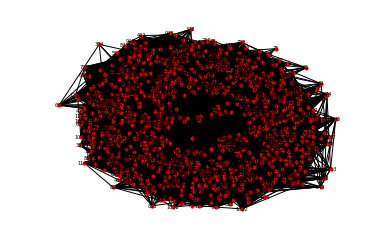

In [58]:
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=10)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge,
                       width=1)
nx.draw_networkx_edges(G, pos, edgelist=esmall,width=0, alpha=0.01, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G, pos, font_size=5, font_family='sans-serif')

plt.axis('off')
plt.show()


##### Stablish an edge threshold

Of course, as I calculate similiarity among all cultures, all have some connection but I will prune all those relations aren't strong enough.

In [55]:
#Calculate some metric to see similarity distribution, as reference
np.median(tt), tt.mean()

(0.366103872900027, 0.3749224666345725)

In [59]:
SG=nx.Graph( [ (u,v,d) for u,v,d in G.edges(data=True) if d ['weight']>0.6])

In [60]:
for i in SG:
    SG.node[i]['Name'] = soc.pref_name_for_society[i]
    SG.node[i]['glottocode'] = soc.glottocode[i]
    SG.node[i]['Lat'] = float(soc.Lat[i])
    SG.node[i]['Long'] = float(soc.Long[i])
nx.write_gexf(SG, "cultures2.gexf")

C:\Users\Cami\Anaconda2\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Cami\Anaconda2\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\Cami\Anaconda2\lib\site-packages\matplotlib\__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Users\Cami\Anaconda2\lib\site-packages\matplotlib\rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


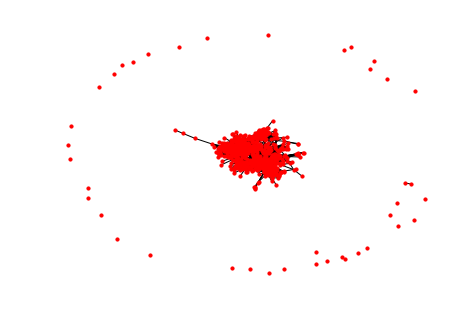

<Figure size 1440x720 with 0 Axes>

In [42]:
nx.draw_spring(SG,node_size = 10)
#plt.axis('off')
plt.figure(figsize=(20,10))
plt.show()

Netwok relations are not too useful to identify patterns. Lets try other approach as clustering.

### Dimensionality reduction

First I want to try dimesionality reduction to get graphical understanding.

Let say we want to reduce all the complexity of our vectors with 467 dimensions and put them back into a map, let say back to two dimensions without losing to much information in the proccess.

There is a number of techniques as PCA or tSNE to do this task. I will use tSNE for graphics and PCA for clustering.

What dimensionality reductions techniques aim to produce is to measure variability among dimensions and capture the most important aspects of each of one, or even discard repeated variations (I mean multicollinearity... is not that simply). 

In [106]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(t7)

In [161]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
Xpca = pca.fit_transform(t7)

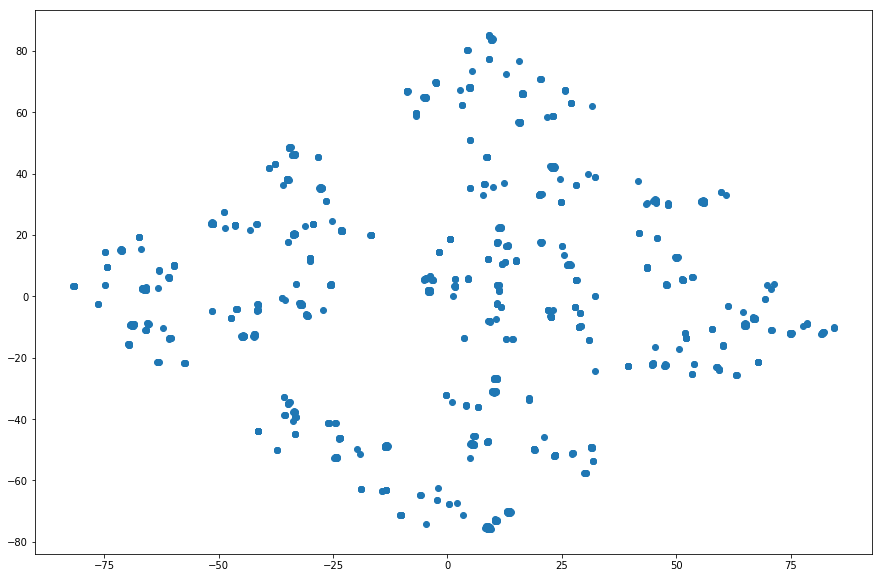

'""\nfor i, txt in enumerate(df[\'group\']):\n    ax.annotate(txt, (df[\'x\'].iloc[i], df[\'y\'].iloc[i]))\n'

In [162]:
df = pd.concat([pd.DataFrame(Xpca),
                pd.Series(t7.index)],
               axis=1)
df.columns = ['x', 'y', 'group']


fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df['x'], df['y'])

plt.show()
"""""
for i, txt in enumerate(df['group']):
    ax.annotate(txt, (df['x'].iloc[i], df['y'].iloc[i]))
"""""

In [160]:
Xpca.shape

(1291L, 24L)

### Make (unsupervised) clusters

Now I am able to apply some clustering algorythms. This is make groups with out telling the algorythm anything besides (maybe) how many groups I supect I could find.

I could try several and see graphicaly if the cluster makes any sense.

In [188]:
#hierarquical

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=170, affinity='euclidean', linkage='ward')  
reducido = cluster.fit_predict(Xpca) 
completo = cluster.fit_predict(t7)

In [121]:
pd.Series(completo).unique()

array([0, 1, 2], dtype=int64)

In [122]:
reducido.shape

(1291L,)

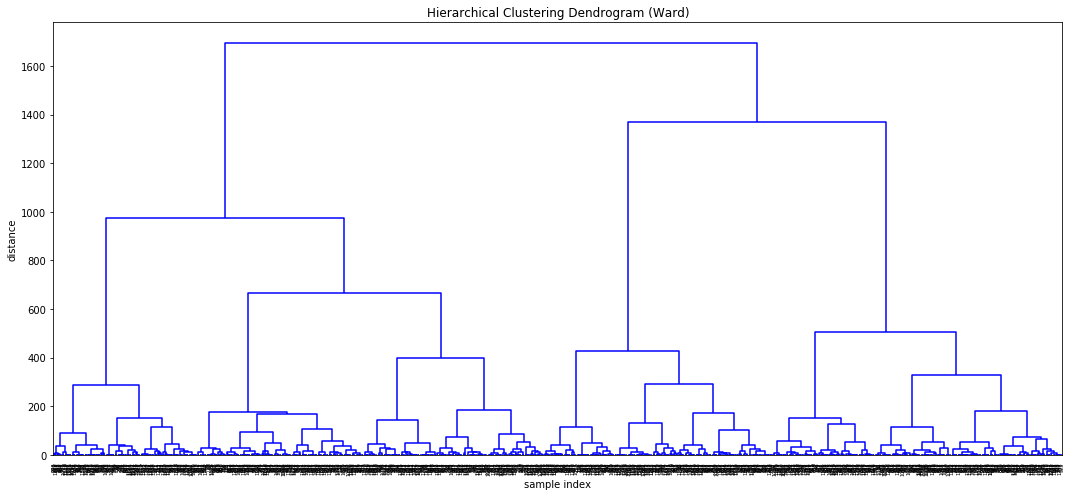

In [164]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(Xpca, 'ward', metric = 'euclidean')
figure = plt.figure(figsize=(15, 7))
dendrogram(
    linkage_matrix,
    color_threshold=0,
)

plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.tight_layout()
plt.show()

In [165]:
#DBSCAN

from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=3, min_samples=2).fit(Xpca)
clustering.labels_
#clustering 
#DBSCAN(algorithm='auto', eps=3, leaf_size=30, metric='euclidean',
#    metric_params=None, min_samples=2, n_jobs=None, p=None)

array([  0,   1,   2, ..., 135,  25,  10], dtype=int64)

In [114]:
pd.Series(clustering.labels_).unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
      dtype=int64)

In [92]:
clustering.labels_.shape

(1291L,)

In [175]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0).fit(Xpca)

In [176]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components = 5).fit(Xpca)
gmp = gm.predict(X_tsne)

In [189]:
t7['DBcluster'] = clustering.labels_
t7['HCR'] = reducido
t7['HCC'] = completo
t7['kmean'] = kmeans.labels_
t7['gm'] = gmp
t7['x'] = Xpca[:,0]
t7['y'] = Xpca[:,1]

## Compare with geografical and linguistic data

Let say we have a model. It will be nice to have some validation of it by comparing it with some other classifications not related with the data (I do not want contamination of my model). One possibility is to see language classification fo groups.

Lets load the glottolog database (glottolog.org) from Max Planck Institute.

In [77]:
lang = pd.read_csv('languoid.csv')

In [78]:
lang.head()

,id,family_id,parent_id,name,bookkeeping,level,status,latitude,longitude,iso639P3code,description,markup_description,child_family_count,child_language_count,child_dialect_count,country_ids
0,aala1237,aust1307,ramo1244,Aalawa,False,dialect,safe,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN
1,aant1238,nucl1709,nort2920,Aantantara,False,dialect,safe,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN
2,aari1238,sout2845,ahkk1235,Aari-Gayil,False,family,safe,NaN,NaN,aiz,NaN,NaN,0,2,0,NaN
3,aari1239,sout2845,aari1238,Aari,False,language,safe,5.95034,36.5721,aiw,NaN,NaN,0,0,0,ET
4,aari1240,book1242,book1242,Aariya,True,language,safe,NaN,NaN,aay,NaN,NaN,0,0,0,IN


In [79]:
lang.shape

(23740, 16)

In [80]:
lang.level.value_counts()

dialect     10920
language     8481
family       4339
Name: level, dtype: int64

In [190]:
#mix the dataset with language information
t8 = t7.merge(soc2, left_index = True, right_on = 'pref_name_for_society')
t8 = t8.merge(lang, left_on = 'glottocode', right_on = 'id')
t8['family_id'][t8.family_id.isnull()] = t8['glottocode'][t8.family_id.isnull()]

C:\Users\Cami\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [191]:
'Number of language families in group culture dataset: {0}'.format(len(t8.family_id.unique()))

'Number of language families in group culture dataset: 173'

In [180]:
lang[lang.id == 'alse1251']

,id,family_id,parent_id,name,bookkeeping,level,status,latitude,longitude,iso639P3code,description,markup_description,child_family_count,child_language_count,child_dialect_count,country_ids
469,alse1251,NaN,NaN,Alsea-Yaquina,False,language,extinct,44.408,-123.94,aes,NaN,NaN,0,0,2,US


In [192]:
#transform language families into numeric values to plot
from sklearn.preprocessing import LabelEncoder

l = LabelEncoder()
t8['lang'] = l.fit_transform(t8.family_id)

Text(0.5,1,'GaussianMix')

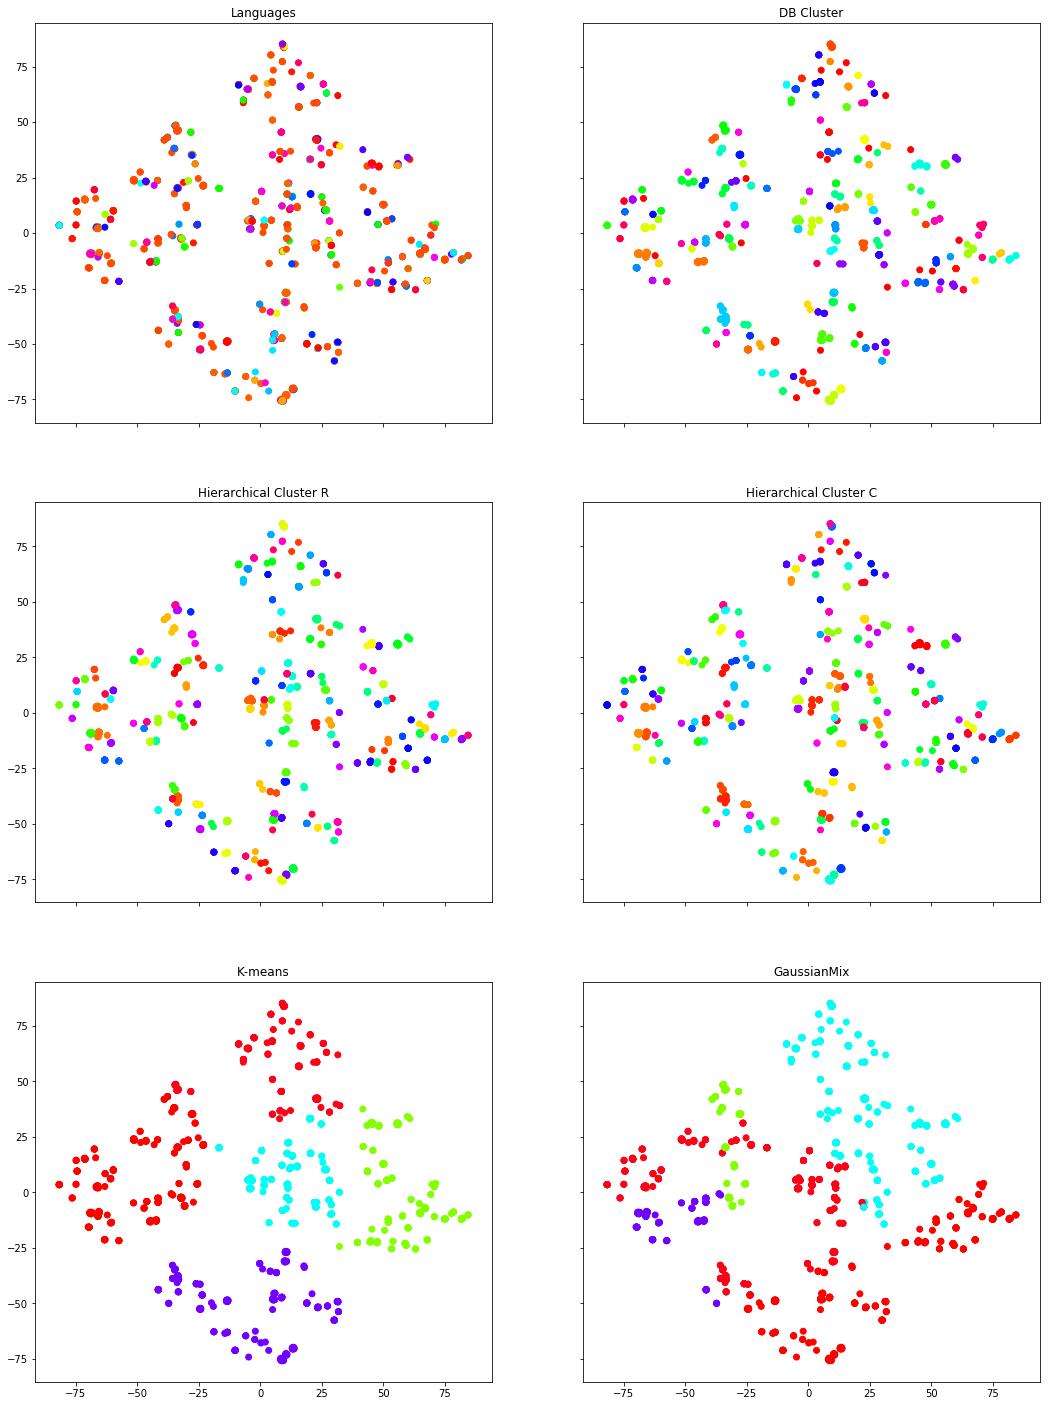

In [193]:
#build dataset to 
"""""
df = pd.concat([pd.DataFrame(X_tsne),
                pd.Series(l2), pd.Series(t8.DBcluster),
               pd.Series(t8.HCR),pd.Series(t8.HCC),
               pd.Series(t8.kmean), pd.Series(t8.gm)],
               axis=1)
df.columns = ['x', 'y','lang','DB','HCR','HCC','kmean','gm']
"""""
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, sharex='col', sharey='row', figsize =(18,25))
ax1.scatter(t8['x'], t8['y'], c=t8['lang'], cmap='hsv')
ax1.set_title('Languages')
ax2.scatter(t8['x'], t8['y'], c=t8['DBcluster'], cmap='hsv')
ax2.set_title('DB Cluster')
ax3.scatter(t8['x'], t8['y'], c=t8['HCR'], cmap='hsv')
ax3.set_title('Hierarchical Cluster R')
ax4.scatter(t8['x'], t8['y'], c=t8['HCC'], cmap='hsv')
ax4.set_title('Hierarchical Cluster C')
ax5.scatter(t8['x'], t8['y'], c=t8['kmean'], cmap='hsv')
ax5.set_title('K-means')
ax6.scatter(t8['x'], t8['y'], c=t8['gm'], cmap='hsv')
ax6.set_title('GaussianMix')


In [118]:
#turn language databese into a tree
from collections import defaultdict

d = defaultdict(lambda: defaultdict(list))

for row in lang.itertuples():
    d[row[1]][row[2]].append(row[3])

In [128]:
from networkx.readwrite import json_graph
L = nx.DiGraph([(1,2)])
data = json_graph.tree_data(L,root=1)
H = json_graph.tree_graph(data)

C:\Users\Cami\Anaconda2\lib\site-packages\networkx\drawing\nx_pylab.py:136: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)


MemoryError: 

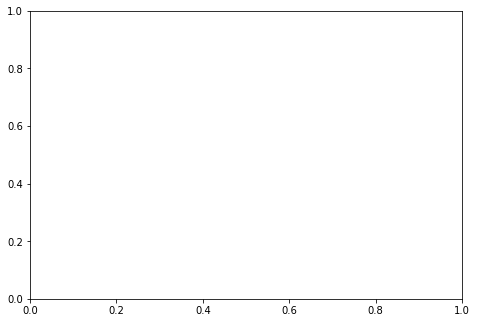

In [129]:
from collections import *
G = nx.DiGraph()

# Helper functions
is_dict = lambda x: type(x) in {dict, OrderedDict, defaultdict}

# Iterate through the layers
for root, level_0 in d.items():
    if len(level_0) > 0:
        for level_0_node, level_1 in level_0.items():
            G.add_edge(root, level_0_node)
            if is_dict(level_1):
                for level_1_node, level_2 in level_1.items():
                    G.add_edge(level_0_node, level_1_node)
                    if is_dict(level_2):
                        for level_2_node, level_3 in level_2.items():
                            G.add_edge(level_1_node, level_2_node)

np.random.seed(8)
nx.draw(G, with_labels=True)

## Conclusion
Languages do not get well represented in tsne space, but clustering algorythms doesn't capure either the groups.